<a href="https://colab.research.google.com/github/S-SufiyaMoosa/SCT_DS_2/blob/main/skillcraft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [9]:
titanic_df=pd.read_csv('/content/titanic.csv')

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Handling missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Cabin'].fillna('Unknown', inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
cols = ['Name','Ticket','Cabin']
titanic_df.drop(cols, axis=1, inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [14]:
titanic_df=titanic_df.dropna()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [15]:
dummies=[]
cols=['Pclass','Sex','Embarked']
for col in cols:
  dummies.append(pd.get_dummies(titanic_df[col]))
titanic_dummies=pd.concat(dummies,axis=1)
titanic_df=pd.concat((titanic_df,titanic_dummies),axis=1)


In [16]:
titanic_df.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   1            891 non-null    bool   
 7   2            891 non-null    bool   
 8   3            891 non-null    bool   
 9   female       891 non-null    bool   
 10  male         891 non-null    bool   
 11  C            891 non-null    bool   
 12  Q            891 non-null    bool   
 13  S            891 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 48.9 KB


In [17]:
titanic_df['Age']=titanic_df['Age'].interpolate()
print(titanic_df)

     PassengerId  Survived   Age  SibSp  Parch     Fare      1      2      3  \
0              1         0  22.0      1      0   7.2500  False  False   True   
1              2         1  38.0      1      0  71.2833   True  False  False   
2              3         1  26.0      0      0   7.9250  False  False   True   
3              4         1  35.0      1      0  53.1000   True  False  False   
4              5         0  35.0      0      0   8.0500  False  False   True   
..           ...       ...   ...    ...    ...      ...    ...    ...    ...   
886          887         0  27.0      0      0  13.0000  False   True  False   
887          888         1  19.0      0      0  30.0000   True  False  False   
888          889         0  28.0      1      2  23.4500  False  False   True   
889          890         1  26.0      0      0  30.0000   True  False  False   
890          891         0  32.0      0      0   7.7500  False  False   True   

     female   male      C      Q      S

In [19]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
print(scaler.data_max_)
print(scaler.transform(data))


MinMaxScaler()
[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [20]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data=asarray([[100,0.001],[8,0.05],[50,0.005],[88,0.07],[4,0.1]])
print(data)
scaler=StandardScaler()
scaler.fit(data)
print(scaler.mean_)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[5.00e+01 4.52e-02]


In [21]:
titanic_df.drop_duplicates(inplace=True)



In [22]:
numerical_stats = titanic_df.describe()
print("Numerical Statistics:\n", numerical_stats)



Numerical Statistics:
        PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.361582    0.523008    0.381594   32.204208
std     257.353842    0.486592   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    0.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200


In [24]:
plt.figure(figsize=(14, 7))




<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

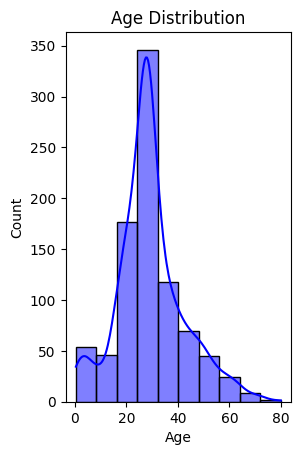

In [25]:
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution')


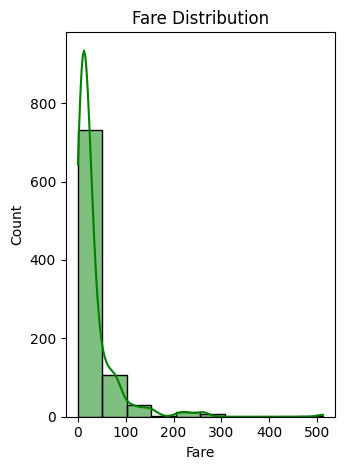

In [26]:
plt.subplot(1, 2, 2)
sns.histplot(titanic_df['Fare'], bins=10, kde=True, color='green')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()


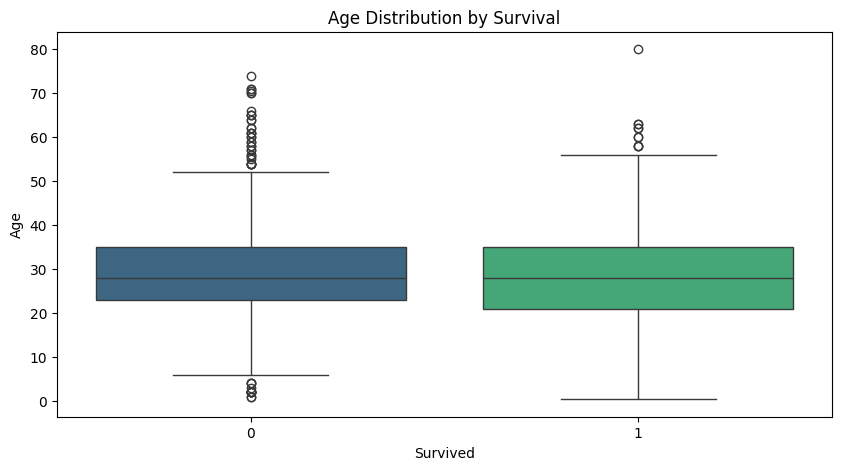

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=titanic_df, palette='viridis')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


